<a href="https://colab.research.google.com/github/jajandres09/Stat_learning_py/blob/main/ISLP_prob2_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.3/802.3 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 26.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 6.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pygam to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 24.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23

In [ ]:
import ISLP
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
auto = pd.read_csv('/content/Auto.csv')
auto.head(10)
# check if there is no NaN values

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [ ]:
auto.isnull().sum().sum()
#no hay NaNs

0

In [ ]:
auto.info()
''' a) ¿Que columnas son cualitativas y cuales cuantitativas?
las cuantitativas son:mpg  1   cylinders  2   displacement
 3   horsepower  4   weight   5   acceleration
 Cualitativas seran las restantes: Year, name , origin '''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


' a) ¿Que columnas son cualitativas y cuales cuantitativas?\nlas cuantitativas son:mpg  1   cylinders  2   displacement  \n 3   horsepower  4   weight   5   acceleration \n Cualitativas seran las restantes: Year, name , origin '

In [ ]:
auto = pd.read_csv('/content/Auto.csv', na_values=['?'])
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


In [ ]:
np.unique(auto['horsepower'])

array([ 46.,  48.,  49.,  52.,  53.,  54.,  58.,  60.,  61.,  62.,  63.,
        64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  74.,  75.,
        76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,
        87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,
        98., 100., 102., 103., 105., 107., 108., 110., 112., 113., 115.,
       116., 120., 122., 125., 129., 130., 132., 133., 135., 137., 138.,
       139., 140., 142., 145., 148., 149., 150., 152., 153., 155., 158.,
       160., 165., 167., 170., 175., 180., 190., 193., 198., 200., 208.,
       210., 215., 220., 225., 230.,  nan])

In [ ]:
for column in auto:
  print(min(auto[column]))

9.0
3
68.0
100
1613
8.0
70
1
amc ambassador brougham


In [ ]:
auto_new = auto.dropna()
auto_new.shape

(392, 9)

In [ ]:
#rango de cada una de las columnas
for column in auto_new:
  print( column,'----------' ,max(auto_new[column]) , '--' , min(auto_new[column]))

mpg ---------- 46.6 -- 9.0
cylinders ---------- 8 -- 3
displacement ---------- 455.0 -- 68.0
horsepower ---------- 230.0 -- 46.0
weight ---------- 5140 -- 1613
acceleration ---------- 24.8 -- 8.0
year ---------- 82 -- 70
origin ---------- 3 -- 1
name ---------- vw rabbit custom -- amc ambassador brougham


De esto ultimo podemos observar que hay variables categoricas como origen y nombre (aunque pudieramos tratar "cilindros" de la misma manera)
que denominaremos  como cualitativas, mientras que el resto de variables seran consideradas como cuantitativas.

In [ ]:
#una forma mas elegante:
def min_max_col(table, predictor):
  #calcula el predictor(columna) de una tabla(df) dada
  return table[predictor].min(), table[predictor].max()


for predictor in ['mpg' , 'cylinders', 'displacement', 'horsepower', 'weight',
                  'acceleration' , 'year' , 'origin']:
  print( predictor,'----------' ,min_max_col(auto_new, predictor))

mpg ---------- (9.0, 46.6)
cylinders ---------- (3, 8)
displacement ---------- (68.0, 455.0)
horsepower ---------- (46.0, 230.0)
weight ---------- (1613, 5140)
acceleration ---------- (8.0, 24.8)
year ---------- (70, 82)
origin ---------- (1, 3)


In [ ]:
#promedio y desviacion estandar
for predictor in ['mpg' , 'cylinders', 'displacement', 'horsepower', 'weight',
                  'acceleration' , 'year' , 'origin']:
  print( predictor,'----------' ,round(auto_new[predictor].mean(),3), round(auto_new[predictor].std(),3))

mpg ---------- 23.446 7.805
cylinders ---------- 5.472 1.706
displacement ---------- 194.412 104.644
horsepower ---------- 104.469 38.491
weight ---------- 2977.584 849.403
acceleration ---------- 15.541 2.759
year ---------- 75.98 3.684
origin ---------- 1.577 0.806


In [ ]:
for predictor in ['mpg' , 'cylinders', 'displacement', 'horsepower', 'weight',
                  'acceleration' , 'year' , 'origin']:
           print(predictor.title(), '-----' ,'promedio =', round(np.mean(auto_new[predictor]),3), ' des. estandar =',
                round(np.std(auto_new[predictor]),3))

Mpg ----- promedio = 23.446  des. estandar = 7.795
Cylinders ----- promedio = 5.472  des. estandar = 1.704
Displacement ----- promedio = 194.412  des. estandar = 104.51
Horsepower ----- promedio = 104.469  des. estandar = 38.442
Weight ----- promedio = 2977.584  des. estandar = 848.318
Acceleration ----- promedio = 15.541  des. estandar = 2.755
Year ----- promedio = 75.98  des. estandar = 3.679
Origin ----- promedio = 1.577  des. estandar = 0.804


In [ ]:
auto_smaller = auto_new.loc[(auto_new.index < 10) | (auto_new.index > 85)]
auto_smaller.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


In [ ]:
for predictor in ['mpg' , 'cylinders', 'displacement', 'horsepower', 'weight',
                  'acceleration' , 'year' , 'origin']:
           print(predictor.title(), '-----' ,'promedio =', round(np.mean(auto_smaller[predictor]),3), ' des. estandar =',
                round(np.std(auto_smaller[predictor]),3))

Mpg ----- promedio = 24.375  des. estandar = 7.86
Cylinders ----- promedio = 5.382  des. estandar = 1.656
Displacement ----- promedio = 187.88  des. estandar = 100.012
Horsepower ----- promedio = 101.003  des. estandar = 35.946
Weight ----- promedio = 2938.855  des. estandar = 810.359
Acceleration ----- promedio = 15.704  des. estandar = 2.716
Year ----- promedio = 77.123  des. estandar = 3.122
Origin ----- promedio = 1.599  des. estandar = 0.818


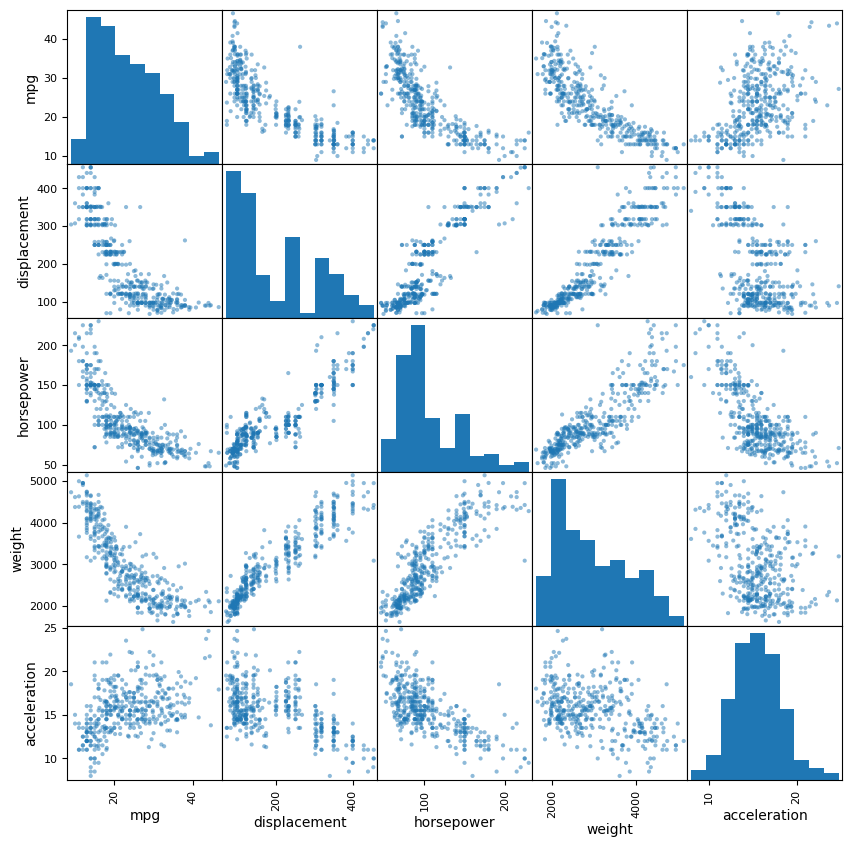

In [ ]:
#explore the predictors graphically
columns_to_plot= ['mpg' , 'displacement', 'horsepower', 'weight','acceleration']
pd.plotting.scatter_matrix(auto_new[columns_to_plot], figsize=(10,10))
plt.show()

# Revision de los plots

desplazamiento, caballos de fuerza y peso muestran en sus graficas cierto grado de correlacion lineal con "millas por galon" con pendientes negativas.
En base a ellos uno puede plantearse la prediccion de los "mpg" en base a las columnas mencionadas arriba